In [11]:
import time

## Start time 
t0 = time.time()

import tensorflow as tf
(Train_x, Train_y), (Test_x, Test_y) = tf.keras.datasets.mnist.load_data()


6


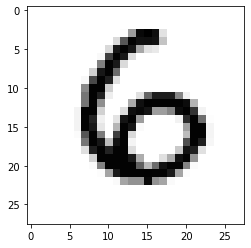

In [12]:

import matplotlib.pyplot as plt

image_index = 7744 # You may select anything up to 60,000
print(Train_y[image_index]) # The label is 8
plt.imshow(Train_x[image_index], cmap='Greys')



In [13]:
Train_x.shape


(60000, 28, 28)

In [14]:
# Reshaping the array to 4-dims so that it can work with the Keras API
Train_x = Train_x.reshape(Train_x.shape[0], 28, 28, 1)
Test_x = Test_x.reshape(Test_x.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [15]:
# Making sure that the values are float so that we can get decimal points after division
Train_x = Train_x.astype('float32')
Test_x = Test_x.astype('float32')


In [16]:
# Normalizing the RGB codes by dividing it to the max RGB value.
Train_x /= 255
Test_x /= 255
print('Train_x shape:', Train_x.shape)
print('Number of images in Train_x', Train_x.shape[0])
print('Number of images in Test_x', Test_x.shape[0])



Train_x shape: (60000, 28, 28, 1)
Number of images in Train_x 60000
Number of images in Test_x 10000


In [17]:

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [27]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dropout(0.2))
model.add(Dense(125, activation=tf.nn.relu))
model.add(Dense(10, activation='softmax'))



In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=Train_x,y=Train_y, epochs=10 )


Epoch 1/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1835 - accuracy: 0.9448
Epoch 2/10
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0695 - accuracy: 0.9786
Epoch 3/10
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0453 - accuracy: 0.9855
Epoch 4/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0344 - accuracy: 0.9887
Epoch 5/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 6/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 7/10
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 8/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 9/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 10/10
60000/60000 [=====================

In [29]:
_,acc = model.evaluate(Test_x, Test_y)

10000/10000 [==============================] - 9s 924us/step


In [30]:
acc*100

98.46000075340271

In [31]:
#display run time
run_time = time.time() - t0
print('Run in %.3f s' % run_time)

Run in 3597.095 s
